In [ ]:
import pandas as pd
import numpy as np

# PandasのDataFrame型に変換
df = pd.read_csv('/Users/hogino/Documents/prog/python/nikkeisoftware/nsw202103vscode/t32103/VSC2/data/onsen-data.csv')

# データセットの先頭５件を表示
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
'''
交通機関: traffic
最寄り駅: station
最寄り駅からのアクセス方法: access
最寄り駅からのアクセス時間: time
最寄り駅からの距離: distance
築年数: age
建物の高さ: story
階層: floor
間取り: layout
専有面積: area
賃貸物件の価格: price
'''

In [ ]:
from sklearn.model_selection import train_test_split

# 説明変数
X = df[["time", "distance", "age", "story", "floor", "area"]].copy()

# 目的変数
y = df.price

# 学習データとテストデータを8:2で分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 分割後の学習データと検証データを9:1で分割
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1)

In [ ]:
import lightgbm as lgb 

# LightGBMの学習のためにデータをセットする
trains = lgb.Dataset(X_train, 
                     label=y_train,
                     categorical_feature='auto')

valids = lgb.Dataset(X_valid,
                     label=y_valid,
                     categorical_feature='auto')

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'vervosity': -1,
    'booting_type': 'gbdt',
    'lambda_l1': 0.0005968637975957531,
    'lambda_l2': 9.395580980549761,
    'num_leaves': 2,
    'feature_fraction': 0.5,
    'bagging_fraction': 1.0,
    'bagging_freq': 0,
    'min_child_samples': 25
}

model = lgb.train(params, 
                trains, 
                valid_sets=valids,
パーセント誤差                )

In [ ]:
# MAPE(平均絶対パーセント誤差)の計算
def calc_mape(y_true, y_pred):
    data_num = len(y_true)
    mape = (np.sum(np.abs(y_pred - y_true) / y_true) / data_num) * 100
    return mape

train_mape = calc_mape(y_train.values, model.predict(X_train))
val_mape = calc_mape(y_valid.values, model.predict(X_valid))
test_mape = calc_mape(y_test.values, model.predict(X_test))

print(f'{train_mape=:.3f}%')
print(f'{val_mape=:.3f}%')
print(f'{test_mape=:.3f}%')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

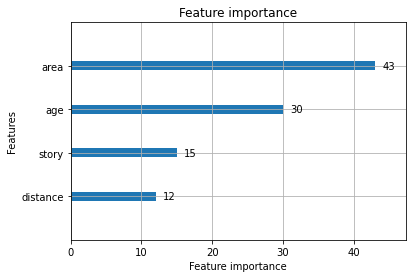

In [12]:
#特徴量の重要度を表示
lgb.plot_importance(model)

In [14]:
import json
import pickle

# 特徴量変数をファイルに出力
with open("/Users/hogino/Documents/prog/python/nikkeisoftware/nsw202103vscode/models/feature.txt", "w") as f:
    f.write(json.dumps(X_train.columns.to_list()))

# 学習済みモデルの保存
with open("/Users/hogino/Documents/prog/python/nikkeisoftware/nsw202103vscode/models/onsen.pkl", "wb") as f:
    pickle.dump(model, f)